<h1 align='center'> 신호 및 시스템 실습 8</h1>

<p style="text-align: right"> 2021.4.29. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;&nbsp;          학번:    &nbsp;&nbsp;         학과(전공):
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 1차 제출: 오후 3:20까지 실습 시간에 마무리한 것을 제출
* 2차 마감: 1차 제출시 완성하지 못한 학생들은 4월 10일 (토) 오후 6:00까지 최종본 제출


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#plt.style.use('seaborn-poster')
#%matplotlib inline

### 이산 푸리에 급수와  역 이산 푸리에 급수

$$\tilde{X}[k] = {\displaystyle \sum_{n=0}^{N-1} \tilde{x}[n] e^{-j\frac{2\pi}{N}nk}}, k=0, 1, \cdots, N-1.$$
$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

#### 행렬과 벡터를 이용한 표현식

\begin{align*} 
	\tilde{\mathbf{X}} &= \mathbf{W}_N \tilde{\mathbf{x}},\\
	\tilde{\mathbf{x}} &= \frac{1}{N}\mathbf{W}^\ast_N \tilde{\mathbf{X}},
\end{align*}
$$
\mathbf{W}_N =  \begin{bmatrix}
        W_N^0 & W_N^0 & \cdots & W_N^0 \cdots & W_N^0 \\ \\[-3mm]
        W_N^0 & W_N^1 & \cdots & W_N^n \cdots & W_N^{N-1} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        W_N^0 & W_N^k & \cdots & W_N^{kn} \cdots & W_N^{k(N-1)} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        W_N^0 & W_N^{N-1} & \cdots & W_N^{(N-1)n} \cdots & W_N^{(N-1)^2}
    \end{bmatrix},
$$
${\displaystyle W_N=e^{-j\frac{2\pi}{N}}}$

행렬 $\mathbf{W}_N$에서 $W_N$의 지수 부분만 행렬로 표현하면 다음과 같다.

$$
\begin{bmatrix}
        0 & 0 & \cdots & 0 \cdots & 0 \\ \\[-3mm]
        0 & 1 & \cdots & n \cdots & {N-1} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        0 & k & \cdots & {kn} \cdots & {k(N-1)} \\ \\[-3mm]
        \vdots & \vdots & \ddots & \vdots & \vdots \\ \\[-3mm]
        0 & {N-1} & \cdots & {(N-1)n} \cdots & {(N-1)^2}
    \end{bmatrix},
$$

#### 문제 1. 
다음 주기 신호 $\tilde{x}[n]$의 푸리에 급수 $\tilde{X}[k]$를 구하라.

$$\tilde{x}[n] = \{\cdots, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, \cdots \}$$

1) $\tilde{x}[n]$의 한 주기를 numpy array로 표현하라.

In [2]:
x = np.array([1, 2, 3, 4])

2) 다음 식을 이용해서 $\tilde{X}[k]$를 구하라.

$$\tilde{X}[k] = {\displaystyle \sum_{n=0}^{N-1} \tilde{x}[n] e^{-j\frac{2\pi}{N}nk}}, k=0, 1, \cdots, N-1.$$

In [3]:
def make_small_to_zero(X, atol=10e-15):
    X.real[np.isclose(X.real, 0, atol = atol)] = 0
    X.imag[np.isclose(X.imag, 0, atol = atol)] = 0

In [4]:
N = 4
X = np.zeros(N, dtype=complex)
W4 = np.exp(-1j  * 2 * np.pi / N)
for k in range(N):
    Xk = 0
    for n in range(N):
        Xk += x[n] * W4 ** (n * k)
    X[k] = Xk
print(X)
make_small_to_zero(X)
print(X)

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


In [5]:
X.real[np.isclose(X.real, 0, atol = 10e-15)] = 0
X.imag[np.isclose(X.imag, 0, atol = 10e-15)] = 0
X

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

3) 아래 셀에 있는 함수 plot_signal_and_spectrum은 시간 영역의 실수 신호 x와 푸리에 급수 X를 파라미터로 받아들여서 복소수 신호 X의 크기 스펙트럼과 위상 스펙트럼의 그래프를 그리는 함수이다. 이 함수를 호출하여 $\tilde{x}[n]$의 그래프와 $\tilde{X}[k]$의 크기 스펙트럼과 위상 스펙트럼의 그래프를 확인하라.

In [6]:
def plot_signal_and_spectrum(x, X):
    plt.subplot(311)
    plt.stem(x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.subplot(312)
    plt.stem(np.abs(X))
    plt.xlabel("$k$")
    plt.ylabel("$|X[k]|$")
    plt.subplot(313)
    plt.stem(np.angle(X))
    plt.xlabel("$k$")
    plt.ylim(-1.1*np.pi, 1.1*np.pi)
    plt.yticks([-np.pi, np.pi], ["-$\pi$", "$\pi$"])
    plt.ylabel(r"$\angle X[k]$")    
    plt.tight_layout()
    plt.show()    

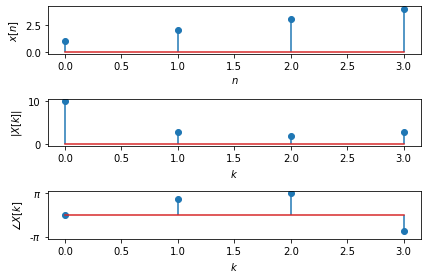

In [7]:
plot_signal_and_spectrum(x, X)

4) 다음 식을 이용해서 2) 번에서 구한 $\tilde{X}[k]$를 이용해서 $\tilde{x}[n]$을 구하고 이것이 원래 신호와 같은지 확인하라.

$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

In [8]:
x1 = np.zeros(N, dtype=complex)
W4ast = np.exp(1j  * 2 * np.pi / N)
for n in range(N):
    xn = 0
    for k in range(N):
        xn += X[k] * W4ast ** (n * k)
    x1[n] = xn / N
print(x1)
make_small_to_zero(x1)
print(x1)

[1.-3.33066907e-16j 2.-5.55111512e-16j 3.+1.66533454e-16j
 4.+0.00000000e+00j]
[1.+0.j 2.+0.j 3.+0.j 4.+0.j]


5) 행렬과 벡터의 곱셈식을 이용하여 푸리에 급수를 계산하려고 한다. 행렬 $\mathbf{X}_4$의 모든 원소들은 $W_4$의 정수승들로 이루어졌다. 이 행렬의 지수에 해당하는 숫자들로만 이루어진 행렬을 numpy의 2차원 배열로 표현하라. 
```
array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])
```

In [9]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [10]:
2 ** a

array([1, 2, 4, 8], dtype=int32)

In [11]:
W = W4 ** a
make_small_to_zero(W)
W

array([ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j])

5) 행렬과 벡터의 곱셈식을 이용하여 푸리에 급수를 계산하려고 한다. 행렬 $\mathbf{X}_4$를 numpy의 2차원 배열로 표현하라.

In [12]:
N = 4
k = np.arange(N).reshape(N,1)
n = np.arange(N)
k * n

array([[0, 0, 0, 0],
       [0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

In [13]:
W4 = np.exp(-1j  * 2 * np.pi / N)
W = W4 ** (k*n)
print(W)
make_small_to_zero(W)
print(W)

[[ 1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j
   1.0000000e+00+0.0000000e+00j  1.0000000e+00+0.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j  6.1232340e-17-1.0000000e+00j
  -1.0000000e+00-1.2246468e-16j -1.8369702e-16+1.0000000e+00j]
 [ 1.0000000e+00+0.0000000e+00j -1.0000000e+00-1.2246468e-16j
   1.0000000e+00+2.4492936e-16j -1.0000000e+00-3.6739404e-16j]
 [ 1.0000000e+00+0.0000000e+00j -1.8369702e-16+1.0000000e+00j
  -1.0000000e+00-3.6739404e-16j  5.5109106e-16-1.0000000e+00j]]
[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]
 [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j  0.-1.j]]


In [14]:
W @ x

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [15]:
X

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

6) 이 결과와 numpy.fft.fft를 이용해서 구한 결과와 비교하라.

In [16]:
np.fft.fft(x)

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

7) 이산 푸리에 급수와 역 이산 푸리에 급수 함수 DFS와 iDFS를 작성하라.

In [17]:
def DFS(x):
    
    return X

In [18]:
def iDFS(X):
    
    return x

#### 예제 1. 톤 신호

다음 신호를 생각해 보자.

$$ x(t) = A \cos(2\pi ft + \phi)$$

다음 함수는 주파수가 f인 사인파를 duration(초) 동안 샘플링 주파수 fs로 샘플링한 이산시간 신호를 numpy.ndarray로 반환하는 함수이다.

In [19]:
def cos_wave(A, f, fs, phi, duration):
    t = np.arange(0, duration, 1/fs)
    return t, A * np.cos(2 * np.pi * f * t + phi)

#### 문제 2. 정현파의 스펙트럼 구하기

1) 주파수가 1 Hz, 진폭이 1, 위상이 0인 사인파를 2초 길이만큼 샘플링한 신호의 그래프를 그려라. 단, 샘플링 주파수는 50 Hz로 한다.

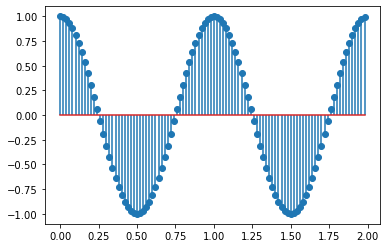

In [20]:
fs = 50.
t, x0 = cos_wave(1.0, 1., fs, 0., 2)

plt.stem(t, x0)
plt.show()

2) 이 정현파의 한 주기를 numpy 배열 x2로 표현하라.

In [21]:
x2 = x0[:50]

3) x2의 이산푸리에 변환을 구하고, x2의 그래프와 X2의 크기 스펙트럼과 위상 스펙트럼을 확인하라.

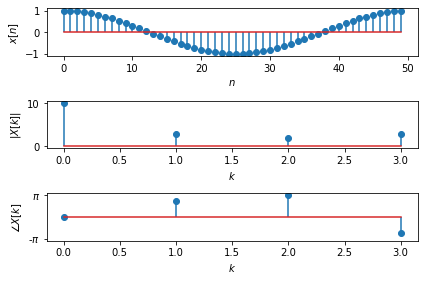

In [23]:
X2 = DFS(x2)
make_small_to_zero(X2)
plot_signal_and_spectrum(x2, X2)

4) 이 신호의 스펙트럼에서 0이 아닌 $X[k]$를 구하라.

**답**:

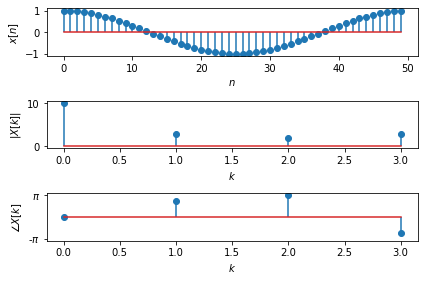

In [24]:
X2 = DFS(x2)
make_small_to_zero(X2, 10e-12)
plot_signal_and_spectrum(x2, X2)

In [ ]:
X2[:5]

In [ ]:
X2[-5:]

5) 4)에서 구한 $X[k]$를 아래 식에 대입해서 $\tilde{x}[n]$의 식을 표현하라.

$$\tilde{x}[n] = {\displaystyle  \frac{1}{N} \sum_{k=0}^{N-1} \tilde{X}[k] e^{j\frac{2\pi}{N}kn}}, n=0, 1, \cdots, N-1.$$

**답**:


\begin{align*}
\tilde{x}[n] &= {\displaystyle  \frac{1}{50} \sum_{k=0}^{99} \tilde{X}[k] e^{j\frac{2\pi}{50}kn}}\\
&= {\displaystyle  \frac{1}{50} \left(25 e^{j\frac{2\pi}{50}(1)n} + 25 e^{j\frac{2\pi}{50}(49)n}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(e^{j\frac{2\pi}{50}(1)n} + e^{j\left(\frac{2\pi}{50}(49)n-2\pi n\right)}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(e^{j\frac{2\pi}{50}(1)n} + e^{j\frac{2\pi}{50}(-1)n}\right)}\\
&= {\displaystyle  \frac{1}{2} \left(\cos\left(\frac{2\pi}{50}n\right) + j\sin\left(\frac{2\pi}{50}n\right) + \cos\left(\frac{2\pi}{50}n\right) -j \sin\left(\frac{2\pi}{50}n\right)\right)}\\
&= \cos\left(\frac{2\pi}{50}n\right) \\
&= \cos\left(2\pi\frac{n}{50}\right)
\end{align*}


6) $x(t)$를 샘플링할 때 사용한 샘플링 주파수가 $f_s = 50$Hz인 것을 고려해서, $X[1]$과 $X[-1]$에서 1과 $-1$은 연속시간 신호 $x(t)$에서 어떤 주파수에 해당하는지 설명하라.

**답**: $f_s = 50$인 경우에 이산시간 신호 $x[n]$으로부터 복원할 수 있는 최대 주파수는 $f_s/2 = 25$ Hz이다.

한 주기 동안 샘플 수가 50 개인 경우에 
- $X[0]$부터 $X[24]$까지는 $0 \le \hat{f} < 0.5$이고 
- $X[25]$부터 $X[49]$까지는 $-0.5 \le \hat{f} < 0$의 주파수 성분이다.

그리고 $-0.5 \le \hat{f} < 0.5$ 사이의 주파수는 연속 시간 주파수의 $-25 \le f < 25$ 범위에 해당한다.

그리고 이 범위의 주파수를 50 개의 샘플로 샘플링한 것과 같기 때문에 $X[k]$는 주파수가 $k$ Hz 성분인 정현파의 성분을 의미한다.



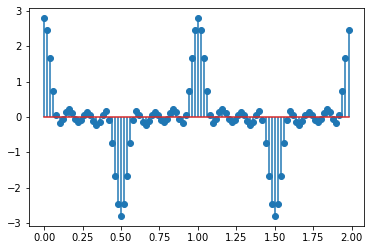

In [28]:
fs = 50.
t, x0 = cos_wave(1.0, 1., fs, 0., 2)
t, x1 = cos_wave(0.8, 3., fs, 0., 2)
t, x2 = cos_wave(0.6, 5., fs, 0., 2)
t, x3 = cos_wave(0.4, 7., fs, 0., 2)

x5 = x0 + x1 + x2 + x3
plt.stem(t, x5)
plt.show()

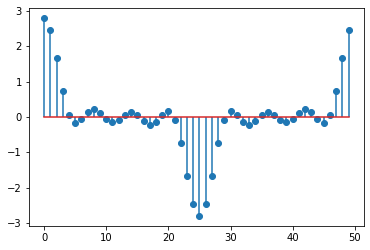

In [29]:
N = 50
plt.stem(np.arange(N), x5[:N])
plt.show()

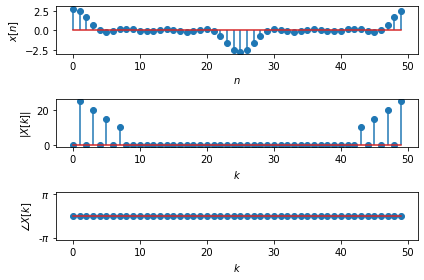

In [30]:
x5 = x5[:N]
X5 = np.fft.fft(x5)

make_small_to_zero(X5, atol=10e-10)
plot_signal_and_spectrum(x5, X5)
